Na stranici http://steinlib.zib.de/steinlib.php nalazi se biblioteka podataka vezana za Štajnerove grafove.  Test podaci na ovoj stranice sadrže informacije o pojedinačnim Štajnerovim grafovima. Oni su  čuvani u .stp formatu koji se koristi samo za čuvanje podataka o Štajnerovim grafovima. Postoji python modul za parsiranje ovog formata koji je opisan na https://github.com/leandron/steinlib.

In [1]:
!pip install steinlib

In [2]:
from steinlib.instance import SteinlibInstance
from steinlib.parser import SteinlibParser
from steinlib.section import SectionParser

import sys

class MySteinLibGraph(SteinlibInstance):

    def comment(self, raw_args, list_args):
        print("Comment section found")

    def comment__end(self, raw_args, list_args):
        print("Comment section end")

    def coordinates(self, raw_args, list_args):
        print("Coordinates section found")

    def eof(self, raw_args, list_args):
        print("End of file found")

    def graph(self, raw_args, list_args):
        print("Graph section found")
        print(raw_args, list_args)

    def header(self, raw_args, list_args):
        print("Header found")

    def terminals(self, raw_args, list_args):
        print("Terminals section found")
        

Nisam se snašao da koristim steinlib python modul. Pa u nastavku pišem kod koji će služiti da se učita graf iz datoteka formata .stp.

In [3]:
def loadGraphFromFile(file_name):

        n_nodes = 0
        n_edges = 0
        n_terminals = 0

        edges = []
        terminals = []

        with open(file_name, 'r') as file:

            for line in file:
                word_list = line.split()

                if(len(word_list) == 0):
                    continue

                if(word_list[0] == 'Nodes'):
                    n_nodes = int(word_list[1])

                if(word_list[0] == 'Edges'):
                    n_edges = int(word_list[1])

                if(word_list[0] == 'Terminals'):
                    n_terminals = int(word_list[1])

                if(word_list[0] == 'E'):
                    edges.append([int(word_list[1]) - 1, int(word_list[2]) - 1, int(word_list[3])])

                if(word_list[0] == 'T'):
                    terminals.append(int(word_list[1]) - 1)
                    
        return [n_nodes, n_edges, n_terminals, edges, terminals]

Napravljena je klasa za čuvanje informacija o učitanim grafovima.

In [4]:
class SteinerTree:
    
    def __init__(self, file_name, opt):
        
        initList = loadGraphFromFile(file_name)
        
        self.name = file_name[-7:-4]
        self.opt = opt
        self.numNodes = initList[0]
        self.numEdges = initList[1]
        self.numTerms = initList[2]
        self.edges = initList[3]
        self.terminals = initList[4]

Provera da li radi učitavanje grafova.

In [5]:
st = SteinerTree('b01.stp', 82)
print(st.name)
print(st.opt)
print(st.numNodes)
print(st.numEdges)
print(st.numTerms)
print(st.edges)
print(st.terminals)

b01
82
50
63
9
[[1, 7, 8], [1, 20, 7], [1, 31, 2], [3, 4, 8], [6, 28, 7], [10, 2, 7], [13, 30, 9], [16, 5, 7], [16, 41, 6], [17, 18, 2], [17, 27, 1], [17, 42, 1], [18, 1, 5], [19, 6, 3], [19, 13, 7], [19, 15, 8], [19, 26, 2], [19, 37, 8], [19, 39, 10], [19, 47, 2], [20, 11, 7], [20, 16, 5], [20, 17, 10], [21, 9, 6], [21, 19, 2], [21, 20, 2], [21, 39, 8], [21, 42, 7], [24, 33, 4], [26, 33, 4], [27, 4, 8], [27, 23, 5], [28, 8, 5], [28, 32, 7], [29, 4, 4], [29, 14, 1], [29, 15, 2], [32, 34, 3], [33, 19, 10], [33, 29, 2], [35, 1, 8], [35, 3, 6], [35, 10, 9], [35, 38, 7], [35, 48, 9], [35, 49, 10], [39, 14, 10], [39, 22, 3], [40, 0, 5], [40, 21, 8], [40, 24, 5], [40, 35, 2], [40, 43, 7], [40, 46, 7], [41, 5, 9], [41, 45, 10], [43, 23, 8], [43, 38, 3], [44, 25, 6], [44, 27, 1], [46, 36, 3], [46, 44, 10], [49, 12, 1]]
[47, 48, 21, 34, 26, 11, 36, 33, 23]


Učitavanje informacija o grafovima iz skupa podataka B.

In [6]:
bGraphList = [
    ('b01.stp', 82),
    ('b02.stp', 83),
    ('b03.stp', 138),
    ('b04.stp', 59),
    ('b05.stp', 61),
    ('b06.stp', 122),
    ('b07.stp', 111),
    ('b08.stp', 104),
    ('b09.stp', 220),
    ('b10.stp', 86),
    ('b11.stp', 88),
    ('b12.stp', 174),
    ('b13.stp', 165),
    ('b14.stp', 235),
    ('b15.stp', 318),
    ('b16.stp', 127),
    ('b17.stp', 131),
    ('b18.stp', 218)
]

In [7]:
import os

bDataPath = os.path.abspath(os.getcwd()) + '\\..\\data\\B'

print(bDataPath)
filenames = os.listdir(bDataPath)
print(filenames)

bGraphs = []

for st_args in bGraphList:
    graphpath = bDataPath + '\\' + st_args[0]
    graphopt = st_args[1]
    bGraphs.append(SteinerTree(graphpath, graphopt))
    
print(len(bGraphs))
print(bGraphs[9].name)

G:\RI\Projekat\RI-Min-Steiner-Tree\code\..\data\B
['b01.stp', 'b02.stp', 'b03.stp', 'b04.stp', 'b05.stp', 'b06.stp', 'b07.stp', 'b08.stp', 'b09.stp', 'b10.stp', 'b11.stp', 'b12.stp', 'b13.stp', 'b14.stp', 'b15.stp', 'b16.stp', 'b17.stp', 'b18.stp']
18
b10


In [97]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse.csgraph import connected_components

In [142]:
import numpy as np

#nasumicno generise populaciju cija jedinka predstavlja skup izabranih cvorova koji ulaze Steinerovo drvo
#konacno resenje je minimalno razapinjuce stablo koje sadrzi sve ove cvorove
def generatePopulation(population_size, solution_len):
    
    pop = []
    
    for i in range(population_size):
        
        sol = []
        
        for j in range(solution_len):
            
            sol.append(round(np.random.rand()))
            
        pop.append(sol)
            
    return np.array(pop)

#evaluira se svaki clan populacije, racunanjem vrednosti minimalnog razapinjuceg stabla
def evaluatePopulation(pop, population_size, solution_len, terminal_list, adj_matrix):
    
    total_value = np.sum(adj_matrix) / 2
    
    N = len(adj_matrix)
    
    population_eval_array = []
    
    #izdvajaju se svi izabrani cvorovi (terminali + cvorovi iz jedinke populacije)
    for p in range(population_size):
        
        s = 0
        
        selected_nodes = np.copy(terminal_list)
        
        for t in range(len(terminal_list)):
            
            if(selected_nodes[t] == 1):
                t = t+1
            else:
                selected_nodes[t] = pop[p][s]
                s = s+1
        
        #pravi se nova matrica susedstva za izabrane cvorove
        M = sum(selected_nodes)
        
        new_adj_matrix = np.zeros((int(M), int(M)))
        
        m = 0
        
        for i in range(N):
            
            if(selected_nodes[i] == 1):
                
                n = 0
                
                for j in range(N):
                    
                    if(selected_nodes[j] == 1):
                        
                        new_adj_matrix[m][n] = adj_matrix[i][j]
                        
                        n = n+1
                m = m+1
        
        
        X = csr_matrix(new_adj_matrix.tolist())
        
        #provera da li je dobijen graf povezan
        #mora biti povezan da bi se racunao za Stainerovo drvo
        n_components, labels = connected_components(csgraph=X, directed=False, return_labels=True)
        
        if(n_components != 1):
            population_eval_array.append(total_value)
        else:
            #vraca gornje-trougaonu matricu povezanosti minimalnog razapinjuceg stabla
            Tcsr = minimum_spanning_tree(X)
            population_eval_array.append(sum(sum(Tcsr.toarray().astype(int))))

    return population_eval_array
        
def cross_over(pop, population_size, solution_len):
    
    new_pop = []
    
    for i in range(population_size):
        
        match = np.random.randint(population_size)
        cpoint = np.random.randint(solution_len)
        
        child1 = []
        child2 = []
        
        for j in range(solution_len):
            
            if j <= cpoint:
                child1.append(pop[i][j])
                child2.append(pop[match][j])
            else:
                child1.append(pop[match][j])
                child2.append(pop[i][j])
                
        new_pop.append(child1)
        new_pop.append(child2)
        
    pop = np.array(pop)    
    new_pop = np.array(new_pop)
    
    return new_pop

def mutation(pop, population_size, solution_len, mutation_chance):
    
    for i in range(population_size):
        
        if np.random.rand() < mutation_chance:
            
            for j in range(solution_len):

                mpoint = np.random.randint(solution_len)

                pop[i][mpoint] = 1 - pop[i][mpoint]

    return pop

def selection(pop, population_size, solution_len, pop_eval):
    
    new_pop = []
    fitness = pop_eval
    fitness = fitness / sum(fitness)
    finess = fitness + 1 - fitness
    fitness = np.cumsum(fitness)
    
    for i in range(population_size):
        for j in range(population_size*2):
            p = np.random.rand()
            
            if(p <= fitness[j]):
                new_pop.append(pop[j])
                break
                
    new_pop = np.array(new_pop)
    
    return new_pop
            
    
def geneticAlgorithm(st: SteinerTree):
    
    #verovatnoca da ce mutirati jedna jedinka populacije
    mutation_chance = 0.2
    
    N = st.numNodes
    edge_number = st.numEdges
    term_number = st.numTerms
    optimal = st.opt
    edges = st.edges
    terminals = st.terminals
    
    terminal_list = np.zeros(N)
    
    for t in terminals:
        terminal_list[t] = 1
    
    #zaustavlja se iteriranje ako dobijemo optimalno resenje
    success = 0
    
    adj_matrix = np.zeros((N, N))
    
    for e in edges:
        adj_matrix[e[0]][e[1]] = e[2]
        adj_matrix[e[1]][e[0]] = e[2]
    
    total_value = np.sum(adj_matrix) / 2
    
    population_size = 10
    solution_len = N - term_number
    
    #generisanje generacije populacije
    pop = generatePopulation(population_size, solution_len)
    
    pop[0] = np.ones(solution_len)
    
    #prvobitna evaluacija populacije
    pop_eval = evaluatePopulation(pop, population_size, solution_len, terminal_list, adj_matrix)
    
    #inicijalno najbolje resenje
    best_value = min(pop_eval)
    best_index = pop_eval.index(best_value)
    best_solution = pop[best_index]
    
    func_eval_GA = 0
    fit_GA = []
    
    while success == 0:
        
        new_pop = cross_over(pop, population_size, solution_len)
        
        pop = mutation(new_pop, population_size * 2, solution_len, mutation_chance)
        
        pop_eval = evaluatePopulation(pop, population_size * 2, solution_len, terminal_list, adj_matrix)
        
        min_value = min(pop_eval)
        min_index = pop_eval.index(min_value)
        min_solution = pop[min_index]
        
        if best_value > min_value:
            best_value = min_value
            best_index = min_index
            best_solution = pop[best_index]
            
        pop = selection(pop, population_size, solution_len, pop_eval)
        
        pop_eval = evaluatePopulation(pop, population_size, solution_len, terminal_list, adj_matrix)
        
        #posle selekcije vraca se dosadasnje najbolje resenje u populaciju
        worst_value = max(pop_eval)
        worst_index = pop_eval.index(worst_value)
        pop[worst_index] = best_solution
        
        func_eval_GA = func_eval_GA + 1
        
        if best_value > total_value:
            fit_GA.append(totalL)
        else:
            fit_GA.append(best_value)
            
        if best_value == optimal:
            success = 1
            
        if func_eval_GA >= 10000:
            break
            
    return (func_eval_GA, fit_GA, best_solution)

In [137]:
func_eval_GA, fit_GA, best_solution = geneticAlgorithm(bGraphs[0])

In [138]:
pop = [best_solution]

pop = np.array(pop)

N = bGraphs[0].numNodes

terminal_list = np.zeros(N)
    
for t in bGraphs[0].terminals:
    terminal_list[t] = 1
        
adj_matrix = np.zeros((N, N))
    
for e in bGraphs[0].edges:
    adj_matrix[e[0]][e[1]] = e[2]
    adj_matrix[e[1]][e[0]] = e[2]

evaluatePopulation(pop, 1, 41, terminal_list, adj_matrix)

[82]

In [139]:
func_eval_GA

1249

In [140]:
import matplotlib.pyplot as plt

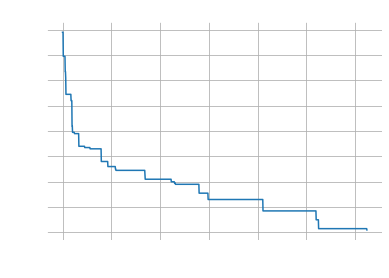

In [141]:
x = np.arange(0, func_eval_GA, 1)
y = fit_GA

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='GA iterations', ylabel='Steiner Tree value',
       title='Genetic algorithm application to b01 dataset')
ax.grid()

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')

plt.show()